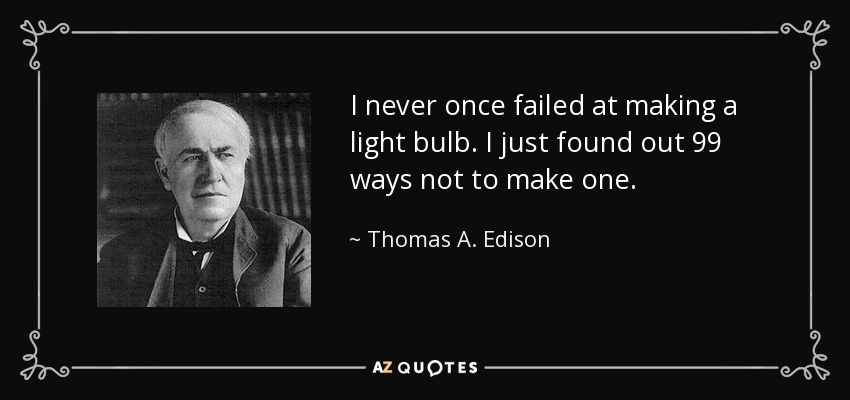

In [210]:
from IPython import display
edison = display.Image("https://www.azquotes.com/picture-quotes/quote-i-never-once-failed-at-making-a-light-bulb-i-just-found-out-99-ways-not-to-make-one-thomas-a-edison-139-98-91.jpg")
edison


In [211]:
#importing libraries
import pandas as pd
import numpy as np 
from  math import sqrt
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [212]:
#reading the data
penguins = pd.read_csv('penguins.csv')
penguins = penguins[['BodyMass_g','Delta15N']]
penguins = penguins.dropna()
penguins


,BodyMass_g,Delta15N
1,3800.0,8.94956
2,3250.0,8.36821
4,3450.0,8.76651
5,3650.0,8.66496
6,3625.0,9.18718
...,...,...
338,4925.0,7.99184
340,4850.0,8.41151
341,5750.0,8.30166
342,5200.0,8.24246


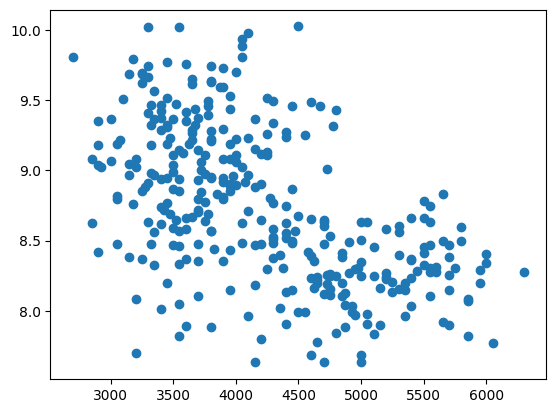

In [213]:
#scatter plot of the data
plt.scatter(penguins["BodyMass_g"],penguins["Delta15N"])

In [214]:
#selecting random centroids
K=5
centroids = (penguins.sample(n=K))
centroids

,BodyMass_g,Delta15N
318,4625.0,8.16582
302,4725.0,8.19101
16,3450.0,9.18528
303,5350.0,8.20042
210,3800.0,9.74492


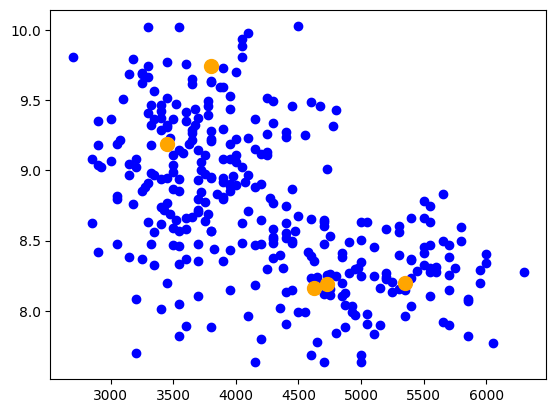

In [215]:
#scatterplot with the centroids
plt.scatter(penguins["BodyMass_g"],penguins["Delta15N"],c='blue')
plt.scatter(centroids["BodyMass_g"],centroids["Delta15N"],c='orange',s = 100)

In [216]:
def euclidean_distance(vecA, vecB):     #Calculate the Euclidean distance between two points
    return np.sqrt(np.sum((vecA - vecB) ** 2))
# Select the values we want to examine
penguins1 = penguins[['BodyMass_g','Delta15N']]
print(penguins1) 


     BodyMass_g  Delta15N
1        3800.0   8.94956
2        3250.0   8.36821
4        3450.0   8.76651
5        3650.0   8.66496
6        3625.0   9.18718
..          ...       ...
338      4925.0   7.99184
340      4850.0   8.41151
341      5750.0   8.30166
342      5200.0   8.24246
343      5400.0   8.36390

[330 rows x 2 columns]


In [217]:
def autoNorm(penguins1):
    minVals = penguins1.min(0) #gives the  minimum values of all columns
    print(minVals)
    maxVals = penguins1.max(0) #gives the  maximum values of all columns
    print(maxVals)
    ranges = maxVals - minVals # determins what the range is  4 each column by calculating (max-min)
    print(ranges)
    normDataSet = np.zeros(np.shape(penguins1)) # creates a zero matrix of the same size as penguins df 
    print(normDataSet)
    m = penguins1.shape[0] # counts the amount of rows in penguins1
    print(m)
    normDataSet = penguins1 - np.tile(minVals, (m, 1)) # calculates the (actual value less min value) 
    print(normDataSet)
    normDataSet = normDataSet/np.tile(ranges, (m, 1))  # divides the normdataset value by the range value to get a range [:1]
    print(normDataSet)
    
    #print sanity check 
    return normDataSet

penguins1 = autoNorm(penguins1)


BodyMass_g    2700.0000
Delta15N         7.6322
dtype: float64
BodyMass_g    6300.00000
Delta15N        10.02544
dtype: float64
BodyMass_g    3600.00000
Delta15N         2.39324
dtype: float64
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0

In [218]:
#selecting random centroids
K=5
centroids = (penguins1.sample(n=K))
centroids

,BodyMass_g,Delta15N
168,0.166667,0.997806
156,0.284722,0.574209
303,0.736111,0.237427
182,0.138889,0.606868
102,0.104167,0.661405


In [219]:
def assign_clusters(penguins, centroids): # Assign each sample to the closest centroids
    clusters = list() #creating an empty list 
    for i, row in penguins.iterrows(): #creating a for loop to iterrate thru the rows
        distances = list() #creating a new empty list
        for j, rowcent in centroids.iterrows():  #creating a for loop to iterrate thru the rows in centroids

           distances.append(euclidean_distance(row,rowcent)) #appends the eucalidian distance between a coresponding row with its centroid
           #it will have as many values as centroids 
 
        cluster = np.argmin(distances) #retursn the index of the smallest distance between the value and 
        #all centroids and in a nutshel tells me which centroid is the closest to the value 
        
        clusters.append(cluster) #append which centroid each row belongs to 
    return clusters

#print(penguins1)
#print(centroids)
clusters = assign_clusters(penguins1, centroids)
clusters


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 1,
 0,
 0,
 0,
 1,
 3,
 1,
 1,
 1,
 4,
 0,
 4,
 1,
 4,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 4,
 1,
 3,
 4,
 3,
 1,
 4,
 0,
 3,
 1,
 3,
 1,
 4,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 4,
 3,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 4,
 1,
 1,
 4,
 4,
 1,
 0,
 1,
 3,
 0,
 1,
 1,
 3,
 1,
 4,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 4,
 1,
 1,
 4,
 1,
 0,
 1,
 4,
 1,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 1,
 0,
 4,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,


In [220]:
def update_centroids(penguins, clusters, K): #Update the centroids based on the mean of the samples assigned to each cluster
    df = penguins
    df["Clusters"] = clusters
    print(df)
    new_centroids = df.groupby(["Clusters"], as_index=False)[['BodyMass_g',"Delta15N"]].mean()
    return new_centroids

new_centroids = update_centroids(penguins1,clusters,5)


     BodyMass_g  Delta15N  Clusters
1      0.305556  0.550450         1
2      0.152778  0.307537         1
4      0.208333  0.473964         1
5      0.263889  0.431532         1
6      0.256944  0.649738         1
..          ...       ...       ...
338    0.618056  0.150273         2
340    0.597222  0.325630         2
341    0.847222  0.279730         2
342    0.694444  0.254993         2
343    0.750000  0.305736         2

[330 rows x 3 columns]


In [221]:
def kmeans(penguins, k, max_iterations=100): # Perform K-Means Clustering on the data
    centroids = init_centroids (penguins, k) #function is called to randomly select "k" initial centroids from the data points.
    for i in range(max_iterations): # a loop that runs for a maximum of "max_iterations"
        clusters = assign_clusters(penguins, centroids) #function is called to assign each data point to the closest centroid.
        new_centroids = update_centroids(penguins, clusters, k) #update_centroids" function is called to calculate new centroids based on the mean of the data points in each cluster
        if np.array_equal(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [222]:

centroids = penguins1.sample(K)[["BodyMass_g", "Delta15N"]].reset_index(drop=True)  # initialize centroids randomly

diff = np.ones(K)  # initialize to non-zero values
while np.all(diff != 0):
    # assign penguins to clusters
    distances = np.zeros((len(penguins1), K))
    for i, centroid in centroids.iterrows():
        distances[:, i] = np.sqrt((penguins1["BodyMass_g"] - centroid["BodyMass_g"]) ** 2 +
                                  (penguins1["Delta15N"] - centroid["Delta15N"]) ** 2)
    clusters = np.argmin(distances, axis=1) + 1
    
    
    centroids_new = penguins1.groupby(clusters).mean()[["BodyMass_g", "Delta15N"]] # update centroids
    diff = np.sum(np.abs(centroids_new - centroids), axis=1)
    centroids = centroids_new
    
    print(diff)


0    0.000000
1    0.339618
2    0.363773
3    0.264604
4    1.166559
5    0.000000
dtype: float64
